In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dating_data_clean = pd.read_csv('dating_data_clean.csv')
dating_data_clean.shape

(8378, 70)

In [34]:
# Drop rows with zero in like:

dating_data_clean['like'] != 0
dating_data_clean = dating_data_clean[dating_data_clean['like'] != 0]
dating_data_clean.shape

(8130, 70)

**Question: How is the relation between each rating and the like scale?**

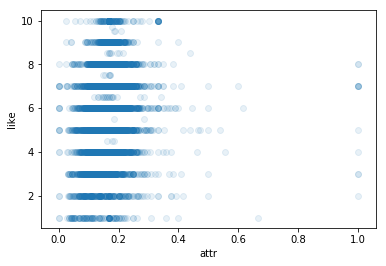

In [55]:
plt.scatter(dating_data_clean['attr'], dating_data_clean['like'], alpha=.10)
plt.xlabel('attr')
plt.ylabel('like')

plt.show()

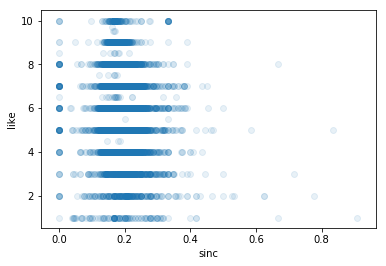

In [56]:
plt.scatter(dating_data_clean['sinc'], dating_data_clean['like'], alpha=.10)
plt.xlabel('sinc')
plt.ylabel('like')

plt.show()

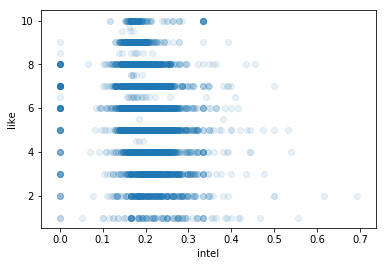

In [57]:
plt.scatter(dating_data_clean['intel'], dating_data_clean['like'], alpha=.10)
plt.xlabel('intel')
plt.ylabel('like')

plt.show()

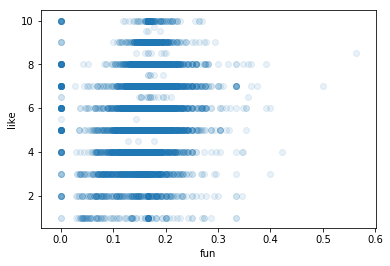

In [54]:
plt.scatter(dating_data_clean['fun'], dating_data_clean['like'], alpha=.10)
plt.xlabel('fun')
plt.ylabel('like')

plt.show()

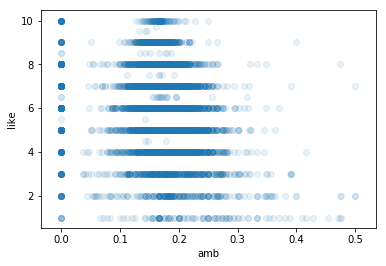

In [58]:
plt.scatter(dating_data_clean['amb'], dating_data_clean['like'], alpha=.10)
plt.xlabel('amb')
plt.ylabel('like')

plt.show()

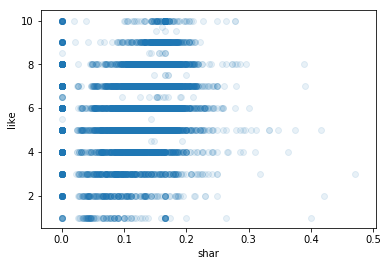

In [59]:
plt.scatter(dating_data_clean['shar'], dating_data_clean['like'], alpha=.10)
plt.xlabel('shar')
plt.ylabel('like')

plt.show()

**Question: How is the relation between each rating and the like scale for decision = yes?**

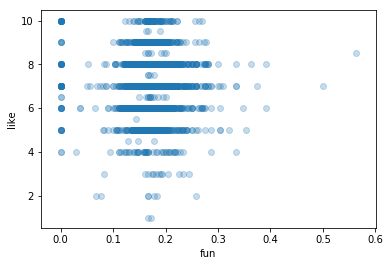

In [70]:
dec_check = dating_data_clean['dec'] == 1
dec_data_event = dating_data_clean.loc[dec_check,('attr', 'sinc', 'intel','fun','amb', 'shar', 'like')]
dec_data_event.describe()

plt.scatter(dec_data_event['fun'], dec_data_event['like'], alpha=0.25)
plt.xlabel('fun')
plt.ylabel('like')

plt.show()

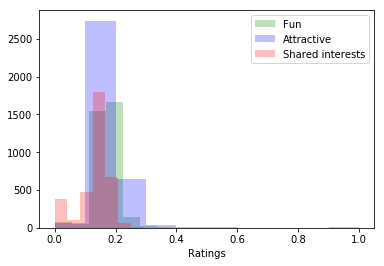

In [80]:
plt.hist(dec_data_event['fun'], bins=10, color='green', alpha=0.25, label='Fun')
plt.hist(dec_data_event['attr'], bins=10, color='blue', alpha=0.25, label='Attractive')
plt.hist(dec_data_event['shar'], bins=10, color='red', alpha=0.25, label='Shared interests')
plt.legend(loc='upper right')

plt.xlabel('Ratings')

plt.show()

**Question: how much you need to like a person in order to go for a second date?**

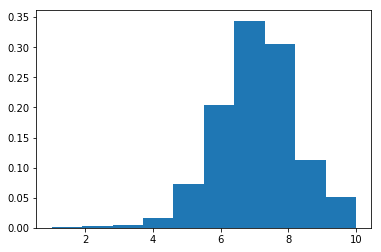

In [38]:
dec_check = dating_data_clean['dec'] == 1
dec_data_yes = dating_data_clean.loc[dec_check,('dec', 'like')]
plt.hist(dec_data_yes['like'],normed=True, bins=10)

plt.show()

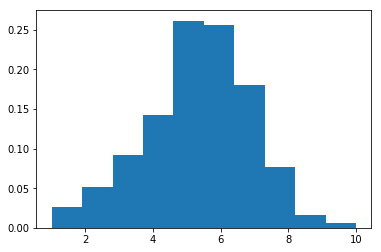

In [39]:
dec_check = dating_data_clean['dec'] == 0
dec_data_no = dating_data_clean.loc[dec_check,('dec', 'like')]
plt.hist(dec_data_no['like'],normed=True, bins=10)

plt.show()

**Which attributes are ranked higher**

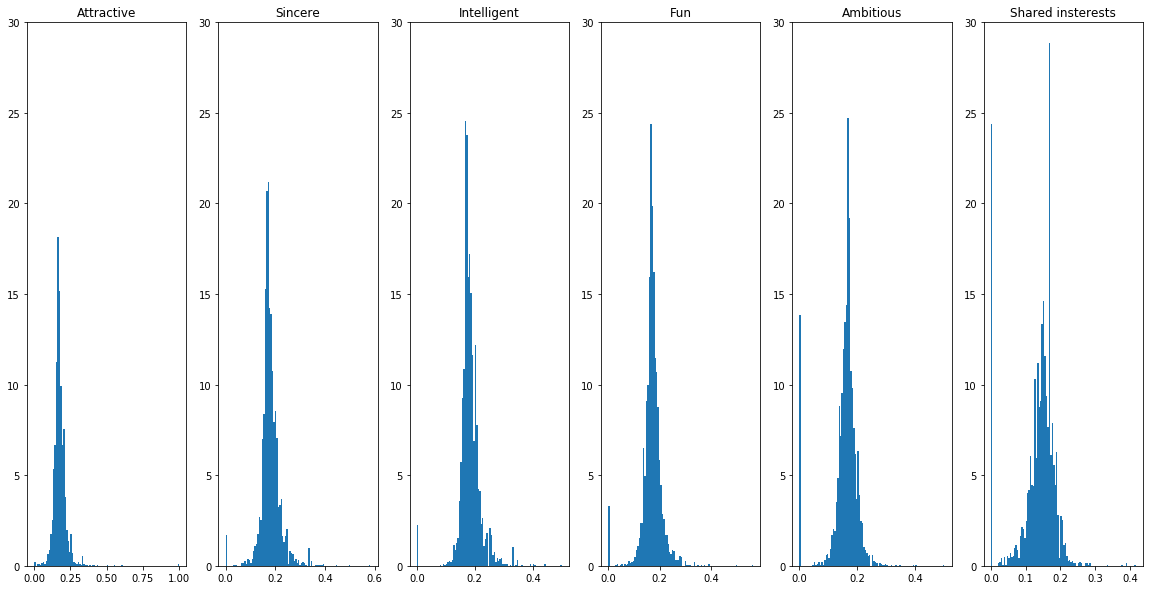

In [87]:
dec_check = dating_data_clean['dec'] == 1
dec_data_event = dating_data_clean.loc[dec_check,'attr':'shar']

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,6,1)
ax2 = fig.add_subplot(1,6,2)
ax3 = fig.add_subplot(1,6,3)
ax4 = fig.add_subplot(1,6,4)
ax5 = fig.add_subplot(1,6,5)
ax6 = fig.add_subplot(1,6,6)


ax1.hist(dec_data_event['attr'], normed=True, bins=100)
ax1.set_title("Attractive")
ax1.set_ylim(0, 30)

ax2.hist(dec_data_event['sinc'], normed=True, bins=100)
ax2.set_title("Sincere")
ax2.set_ylim(0, 30)

ax3.hist(dec_data_event['intel'], normed=True, bins=100)
ax3.set_title("Intelligent")
ax3.set_ylim(0, 30)

ax4.hist(dec_data_event['fun'], normed=True, bins=100)
ax4.set_title("Fun")
ax4.set_ylim(0, 30)

ax5.hist(dec_data_event['amb'], normed=True, bins=100)
ax5.set_title("Ambitious")
ax5.set_ylim(0, 30)

ax6.hist(dec_data_event['shar'], normed=True, bins=100)
ax6.set_title("Shared insterests")
ax6.set_ylim(0, 30)

plt.show()



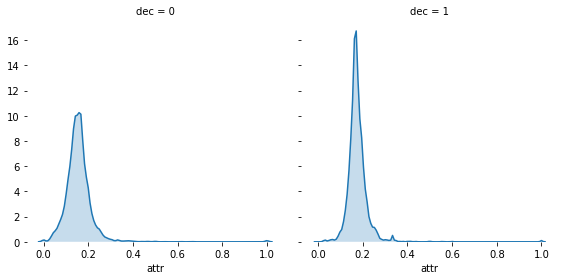

In [107]:

g = sns.FacetGrid(dating_data_clean, col="dec", size=4)
g.map(sns.kdeplot, "attr", shade=True)

sns.despine(left=True, bottom=True)

plt.show()

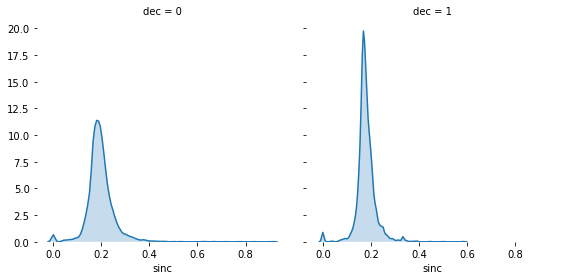

In [98]:
g = sns.FacetGrid(dating_data_clean, col="dec", size=4)
g.map(sns.kdeplot, "sinc", shade=True)

sns.despine(left=True, bottom=True)

plt.show()



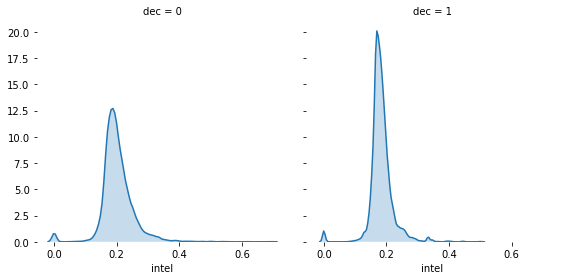

In [99]:
g = sns.FacetGrid(dating_data_clean, col="dec", size=4)
g.map(sns.kdeplot, "intel", shade=True)

sns.despine(left=True, bottom=True)

plt.show()

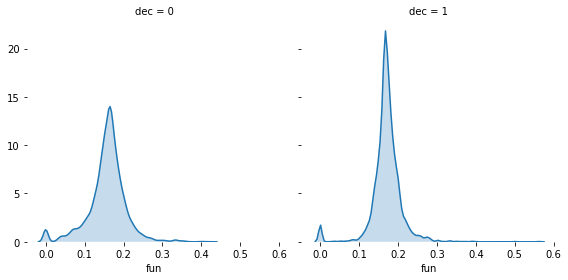

In [100]:
g = sns.FacetGrid(dating_data_clean, col="dec", size=4)
g.map(sns.kdeplot, "fun", shade=True)

sns.despine(left=True, bottom=True)

plt.show()

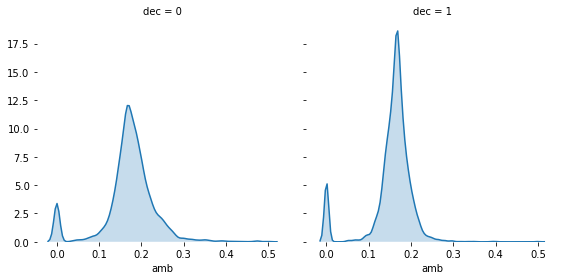

In [101]:
g = sns.FacetGrid(dating_data_clean, col="dec", size=4)
g.map(sns.kdeplot, "amb", shade=True)

sns.despine(left=True, bottom=True)

plt.show()

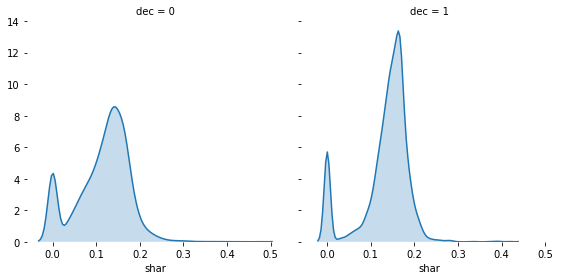

In [102]:
g = sns.FacetGrid(dating_data_clean, col="dec", size=4)
g.map(sns.kdeplot, "shar", shade=True)

sns.despine(left=True, bottom=True)

plt.show()

**Does the distance between what is important for the couple at sign up has any relation to the like scale?**

In [89]:
dis_att = (dating_data_clean['pf_o_att'] - dating_data_clean['attr1_1'])**2
dis_sinc = (dating_data_clean['pf_o_sin'] - dating_data_clean['sinc1_1'])**2
dis_intel = (dating_data_clean['pf_o_int'] - dating_data_clean['intel1_1'])**2
dis_fun = (dating_data_clean['pf_o_fun'] - dating_data_clean['fun1_1'])**2
dis_amb = (dating_data_clean['pf_o_amb'] - dating_data_clean['amb1_1'])**2
dis_shared = (dating_data_clean['pf_o_sha'] - dating_data_clean['shar1_1'])**2
dist_signup = (dis_att + dis_sinc + dis_intel + dis_fun + dis_amb + dis_shared) ** 1/2
dating_data_clean['dist_signup'] = dist_signup




/Users/tpancier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


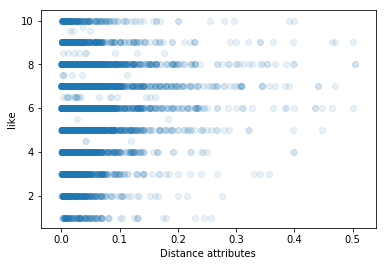

In [90]:
plt.scatter(dating_data_clean['dist_signup'], dating_data_clean['like'], alpha=.10)
plt.xlabel('Distance attributes')
plt.ylabel('like')

plt.show()

In [51]:
from scipy.stats.stats import pearsonr
r, p_value = pearsonr(dating_data_clean['dist_signup'], dating_data_clean['like'])
r

0.039369247462585424

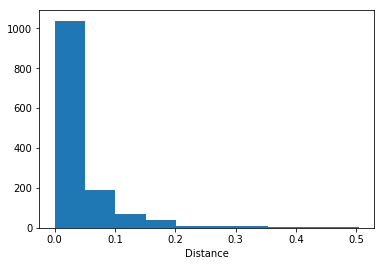

In [52]:
# Histogram for distances that have match = yes:

dating_match = dating_data_clean[dating_data_clean['match'] == 1]
plt.hist(dating_match['dist_signup'], bins=10)
plt.xlabel('Distance')

plt.show()

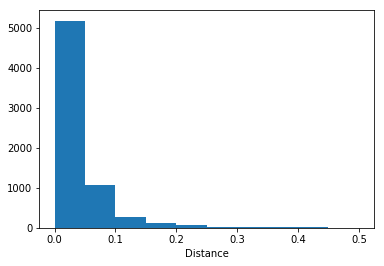

In [53]:
# Histogram for distances that have match = no:

dating_no_match = dating_data_clean[dating_data_clean['match'] == 0]
plt.hist(dating_no_match['dist_signup'], bins=10)
plt.xlabel('Distance')

plt.show()

## match = no has a higher volume

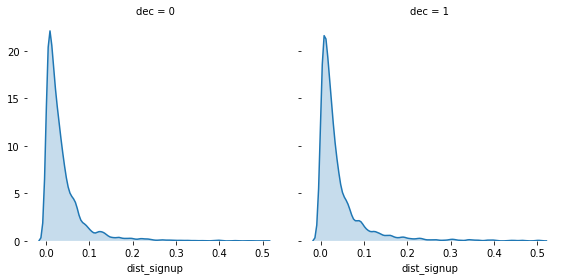

In [108]:
g = sns.FacetGrid(dating_data_clean, col="dec", size=4)
g.map(sns.kdeplot, "dist_signup", shade=True)

sns.despine(left=True, bottom=True)

plt.show()